<a href="https://colab.research.google.com/github/JOekh1122/Linear-Regression/blob/main/Copy_of_Regression_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1 – Simple Linear Regression**
**Goal:** Understand the basics of regression by creating your own dataset.

### Steps:
1. Formulate your own equation in the form:  
   $
   y = m x + c
   $
   
   Example: $y = 2x + 3$
2. Generate X values (at least 100 numbers between your chosen range).
3. Generate Y values using your equation.
4. Add small random noise to Y to make it realistic.
5. Split data into train and test splits
6. Fit a Simple Linear Regression model.
7. Print learned coefficient and intercept.
8. Split the data into train and test sets (80%-20%).
9. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.
10. Visualize the points and the fitted line.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
X=np.random.rand(100)
X=X.reshape(-1,1)
X


array([[0.80167867],
       [0.1436746 ],
       [0.55285415],
       [0.55412624],
       [0.12038028],
       [0.76533618],
       [0.37854492],
       [0.95542621],
       [0.20298321],
       [0.457616  ],
       [0.7905141 ],
       [0.09346375],
       [0.94054656],
       [0.83344906],
       [0.30134967],
       [0.89440794],
       [0.21943314],
       [0.60752934],
       [0.04230065],
       [0.77390233],
       [0.76186816],
       [0.38896006],
       [0.37761956],
       [0.79639787],
       [0.1278352 ],
       [0.11644393],
       [0.93315966],
       [0.68883428],
       [0.35795905],
       [0.6903681 ],
       [0.91088708],
       [0.29461448],
       [0.97980732],
       [0.03233188],
       [0.26905215],
       [0.75523431],
       [0.68469726],
       [0.51817947],
       [0.10195471],
       [0.59857266],
       [0.19155551],
       [0.30020124],
       [0.96273068],
       [0.88213231],
       [0.80632673],
       [0.5338213 ],
       [0.00418214],
       [0.189

In [4]:
m=3
c=4
Y=m*X+c
Y

array([[6.40503602],
       [4.43102381],
       [5.65856246],
       [5.66237871],
       [4.36114083],
       [6.29600854],
       [5.13563475],
       [6.86627862],
       [4.60894963],
       [5.37284801],
       [6.37154231],
       [4.28039124],
       [6.82163968],
       [6.50034717],
       [4.904049  ],
       [6.68322381],
       [4.65829941],
       [5.82258803],
       [4.12690196],
       [6.321707  ],
       [6.28560447],
       [5.16688019],
       [5.13285867],
       [6.38919361],
       [4.38350559],
       [4.3493318 ],
       [6.79947899],
       [6.06650285],
       [5.07387715],
       [6.0711043 ],
       [6.73266125],
       [4.88384345],
       [6.93942197],
       [4.09699563],
       [4.80715644],
       [6.26570294],
       [6.05409179],
       [5.55453842],
       [4.30586414],
       [5.79571799],
       [4.57466654],
       [4.90060373],
       [6.88819203],
       [6.64639693],
       [6.4189802 ],
       [5.60146391],
       [4.01254643],
       [4.568

In [5]:
print(X.shape)
print(Y.shape)

(100, 1)
(100, 1)


In [6]:
noise=np.random.rand(100,1)
noise
Y=Y+noise


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [9]:
print(model.coef_)
print(model.intercept_)

[[2.92967537]]
[4.50701667]


# **The model.coef and model.intercept are very close to the original values but there is small change due to adding the noise**

In [10]:
y_pred_test=model.predict(X_test)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae=mean_absolute_error(Y_test,y_pred_test)
mse=mean_squared_error(Y_test,y_pred_test)
r2=r2_score(Y_test,y_pred_test)
print(f"For Test data->\nmae: {mae}, mse: {mse}, r2: {r2}")

For Test data->
mae: 0.23668702158767232, mse: 0.07845645837133083, r2: 0.906102109537974


In [13]:
y_pred_train=model.predict(X_train)
mae=mean_absolute_error(Y_train,y_pred_train)
mse=mean_squared_error(Y_train,y_pred_train)
r2=r2_score(Y_train,y_pred_train)
print(f"For Train data->\nmae: {mae}, mse: {mse}, r2: {r2}")

For Train data->
mae: 0.24898286906662484, mse: 0.083959118190797, r2: 0.899714662237014


# **From mae,mse,r2 for both train and test data there is no overfit and no underfit.**

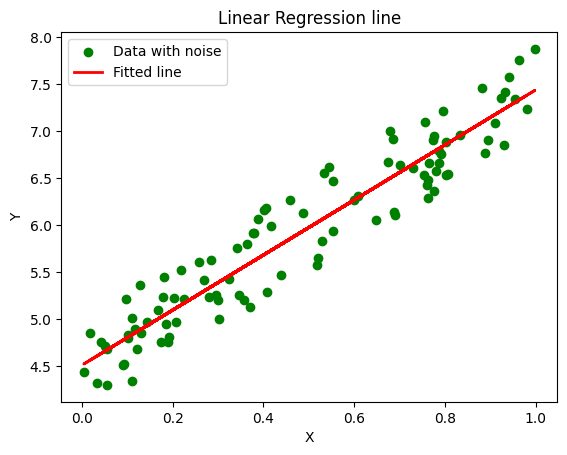

In [14]:
plt.scatter(X, Y, label='Data with noise', color='green')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Fitted line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression line')
plt.legend()
plt.show()

# **Assignment 2 – Multiple Linear Regression**
**Goal:** See how multiple features affect predictions.

### Steps:
1. Formulate your own equation:
   $
   y = a_1 x_1 + a_2 x_2 + c
   $
2. Generate `x1` and `x2` values (at least 100 numbers each).
3. Generate Y values with noise.
4. Split data into train and test splits
5. Fit a Multiple Linear Regression model.
6. Compare coefficients and intercept to your original equation.
7. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [15]:
X1=np.random.rand(200)*100
X1=X1.reshape(-1,1)
X2=np.random.rand(200)*100
X2=X2.reshape(-1,1)
print(X1.shape,X2.shape)
X=pd.DataFrame(np.hstack((X1,X2)))
X

(200, 1) (200, 1)


,0,1
0,85.088908,39.726304
1,80.886172,31.672700
2,46.128741,52.609327
3,7.981822,1.760411
4,69.465213,97.711187
...,...,...
195,13.917545,71.639121
196,19.068381,52.291243
197,34.992641,73.169411
198,47.168739,79.039501


In [16]:
a1=4
a2=10
c=6
noise=np.random.rand(200,1)
Y=a1*X1+a2*X2+c+noise
Y.shape

(200, 1)

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [18]:
model=LinearRegression()
model.fit(X_train,Y_train)
print(model.coef_)
print(model.intercept_)

[[ 4.00007678 10.00036776]]
[6.45565155]


In [19]:
y_pred_test=model.predict(X_test)

In [20]:
mae=mean_absolute_error(Y_test, y_pred_test)
mse=mean_squared_error(Y_test,y_pred_test)
r2=r2_score(Y_test,y_pred_test)
print(f"For Test data->\nmae: {mae}, mse: {mse}, r2: {r2}")

For Test data->
mae: 0.2302926820238568, mse: 0.07118706241257837, r2: 0.9999993874063368


In [21]:
y_pred_train=model.predict(X_train)
mae=mean_absolute_error(Y_train,y_pred_train)
mse=mean_squared_error(Y_train,y_pred_train)
r2=r2_score(Y_train,y_pred_train)
print(f"For Train data->\nmae: {mae}, mse: {mse}, r2: {r2}")

For Train data->
mae: 0.2471716373200378, mse: 0.08148307761189888, r2: 0.9999992236464322


# **Assignment 3 – Polynomial Regression**
**Goal:** Model non-linear relationships.

### Steps:
1. Formulate your own equation:
   $
   y = ax^2 + bx + c
   $
2. Generate X values and Y values with noise.
3. Use `PolynomialFeatures` to transform X.
4. Split the data into train and test sets (80%-20%).
5. Fit a Linear Regression model on transformed features.
6. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



## Machine Learning Project Pipeline

### 1. **Exploratory Data Analysis (EDA)**
- Inspect dataset structure (`.info()`, `.describe()`)
- Check for missing values and duplicates
- Understand feature types (numeric, categorical, datetime, etc.)
- Visualize data distributions (histograms, boxplots, bar charts)
- Identify correlations between features and target
- Detect outliers and anomalies

---

### 2. **Data Cleaning**
- Handle missing values (drop, fill with mean/median/mode, or use predictive imputation)
- Remove duplicates
- Fix inconsistent data formats (e.g., date parsing, string trimming)
- Correct data entry errors or outliers (if verified)

---

### 3. **Data Pre-processing**
- Convert data types if necessary (e.g., `object` to `datetime` or numeric)
- Handle categorical variables:
  - **Encoding**:
    - One-Hot Encoding (for nominal categories)
    - Ordinal Encoding (for ordered categories)
- Verify numeric features:
  - Check for incorrect values (e.g., negative ages)
  - Apply transformations if needed (e.g., log transform for skewed data)

---

### 4. **Scaling Numeric Features**
- Standardization (`StandardScaler`) — mean = 0, std = 1
- Normalization (`MinMaxScaler`) — values between 0 and 1
- Robust Scaling (less sensitive to outliers)

---

### 5. **Splitting Data**
- **Train-Test Split**
  - Typically 70–80% for training, 20–30% for testing
  - Use `train_test_split` from `sklearn`
  - Set `random_state` for reproducibility
- Optional: create a **validation set** for model tuning

---

### 6. **Modeling**
- Choose model type based on task:
  - **Regression:** Linear Regression
- Train the model on training data (Your target is `price`)

---

### 7. **Evaluating the Model**
- **On Training Data**:
  - Evaluate for underfitting (low train performance)
- **On Testing Data**:
  - Evaluate for overfitting (high train, low test performance)
- Metrics:
  - **Regression:** MAE, MSE, RMSE, R²

---

### 8. **Final Steps**
- Save the model (`joblib` or `pickle`)



In [22]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/airlines-flights-data


In [23]:
os.listdir(path)

['airlines_flights_data.csv']

In [24]:
full_path = os.path.join(path,os.listdir(path)[0])

In [25]:
import pandas as pd
df = pd.read_csv(full_path)

In [26]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## OPTIONAL SUGGESTIONS for Visualizations for Flight Price Dataset
> **YOU MUST MAKE VISUALIZATIONS. THESE ARE ONLY SUGGESTIONS**
### 1. **Numeric Data Visualizations**
(Columns: `duration`, `days_left`, `price`)

**a. Distribution of Numeric Features**
- **Histograms / KDE plots**  
  - Price distribution — check for skewness.  
  - Duration distribution — detect common flight lengths.  
  - Days left — reveal booking patterns.

**b. Boxplots for Outlier Detection**
- Boxplot of `price` — spot extreme values.
- Boxplot of `duration` grouped by `class` or `airline`.

**c. Price vs Numeric Feature Relationships**
- Scatter plot: `price` vs `duration` (color by `class` or `airline`).
- Scatter plot: `price` vs `days_left` (color by `class` or `stops`).

---

### 2. **Categorical Data Visualizations**
(Columns: `airline`, `flight`, `source_city`, `departure_time`, `stops`, `arrival_time`, `destination_city`, `class`)

**a. Price Trends by Category**
- **Boxplots**
  - `price` by `airline` — compare average fares.
  - `price` by `source_city` or `destination_city`.
  - `price` by `stops` — direct vs connecting flights.

**b. Frequency Counts**
- Bar plots of `airline` frequency — market share.
- Bar plots of `source_city` and `destination_city` — most common routes.
- Bar plots of `departure_time` (morning, afternoon, evening, night) — popular times.

**c. Grouped Statistics**
- Mean `price` by `airline` and `class` — grouped bar plots.
- Mean `price` by `(source_city, destination_city)` pairs.

---

### 3. **Mixed Insights**

**a. Heatmaps / Pivot Tables**
- Pivot table: average `price` for each `(source_city, destination_city)` pair — show as heatmap.
- Pivot table: average `price` for each `(airline, class)` — reveal premium vs economy gap.

**b. Correlation Heatmap (Numeric Only)**
- Show correlation between `duration`, `days_left`, and `price`.

---
*These visualizations can reveal pricing patterns, airline competitiveness, route popularity, and booking behavior trends.*


In [27]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [29]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [30]:
df.drop(columns=['index'],inplace=True)

In [31]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [32]:
df.isna().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


In [33]:
df.duplicated().sum()

np.int64(0)

# **There are no Nulls or Duplicated data**

In [34]:
df.dtypes

,0
airline,object
flight,object
source_city,object
departure_time,object
stops,object
arrival_time,object
destination_city,object
class,object
duration,float64
days_left,int64


In [35]:
col=df.select_dtypes(include=['object']).columns
col

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class'],
      dtype='object')

In [36]:
for i in col:
  print(f" {i}:{df[i].unique()}")

 airline:['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
 flight:['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
 source_city:['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
 departure_time:['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
 stops:['zero' 'one' 'two_or_more']
 arrival_time:['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
 destination_city:['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
 class:['Economy' 'Business']


In [37]:
df['flight'].nunique()

1561

In [38]:
df['flight'].str[0:2].unique()

array(['SG', 'I5', 'UK', 'G8', '6E', 'AI', '6.', '0.'], dtype=object)

<Axes: xlabel='price', ylabel='Count'>

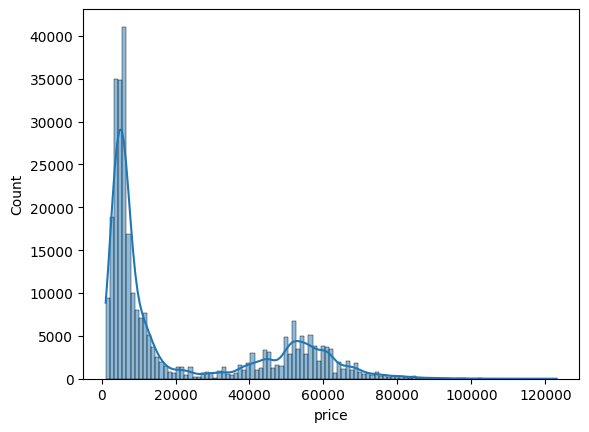

In [39]:
sns.histplot(df['price'],kde=True)

# **There is Right Skewe**

<Axes: xlabel='duration', ylabel='Count'>

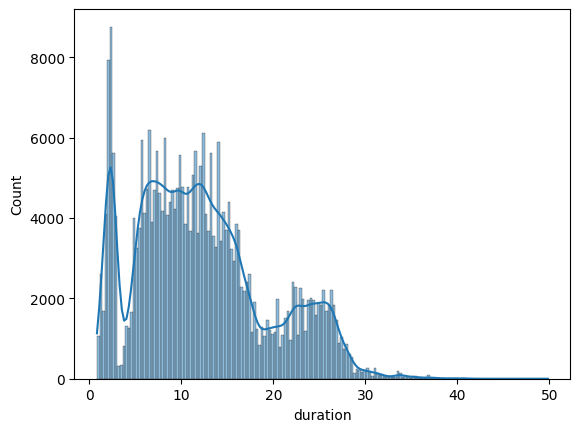

In [40]:
sns.histplot(df['duration'],kde=True)

# **Common Flight Lengths are in range[5,20]**

<Axes: xlabel='days_left', ylabel='Count'>

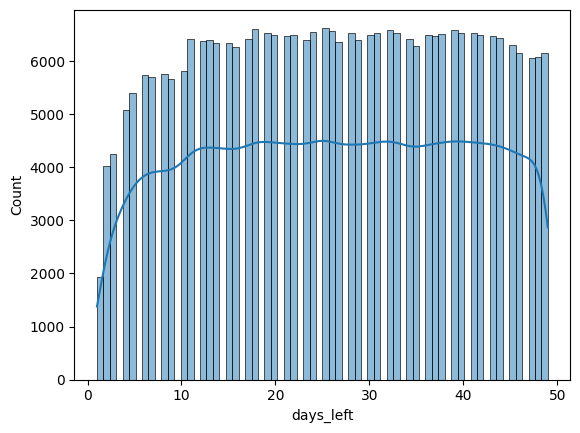

In [41]:
sns.histplot(df['days_left'],kde=True)

# **maybe all of them are the same except the first 5 days.**


<Axes: xlabel='count', ylabel='airline'>

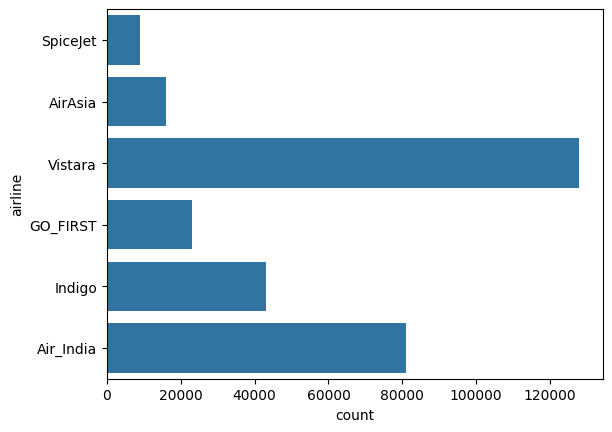

In [42]:
sns.countplot(df['airline'])

# **Vistara airline has the most flights**

<Axes: xlabel='arrival_time', ylabel='count'>

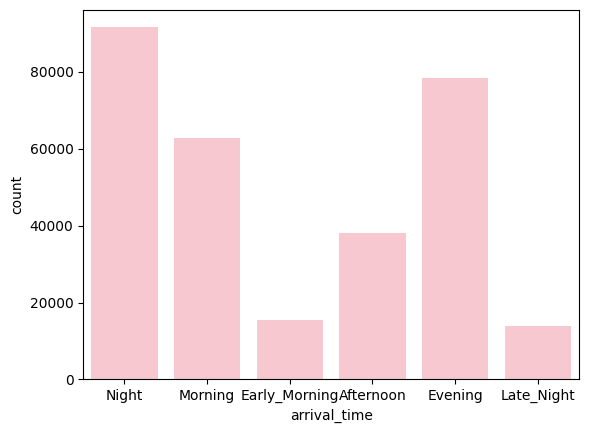

In [43]:
sns.countplot(x=df['arrival_time'],color='pink')

# **Most Arrival Time at Night**

<Axes: xlabel='stops', ylabel='count'>

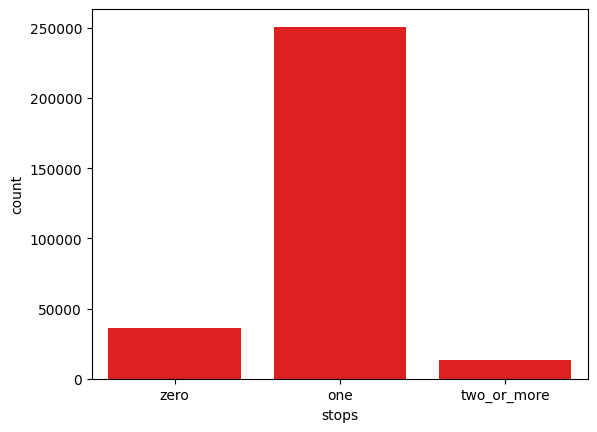

In [44]:
sns.countplot(x=df['stops'],color='r')

# **Most Travels have Only One Stop**

<Axes: xlabel='stops', ylabel='price'>

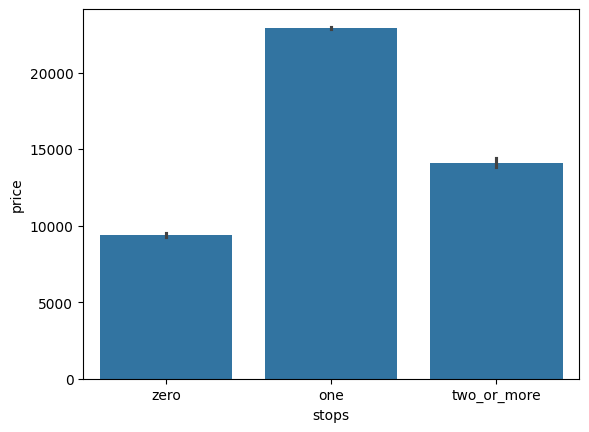

In [45]:
sns.barplot(x=df['stops'],y=df['price'])

# **Flights that have one stops are more expensive**

<Axes: xlabel='departure_time', ylabel='count'>

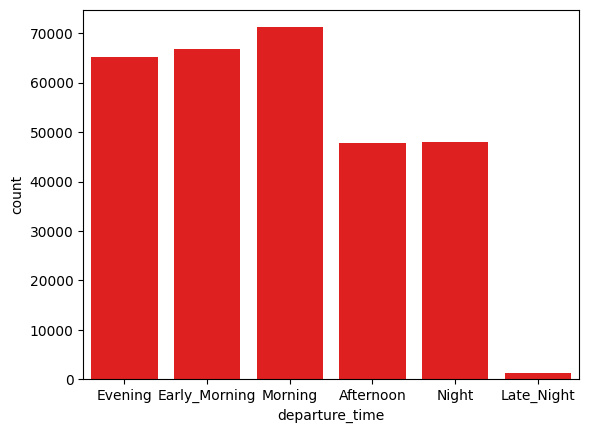

In [46]:
sns.countplot(x=df['departure_time'],color='r')

# **Most Departure Time at Morning**

<Axes: xlabel='class', ylabel='count'>

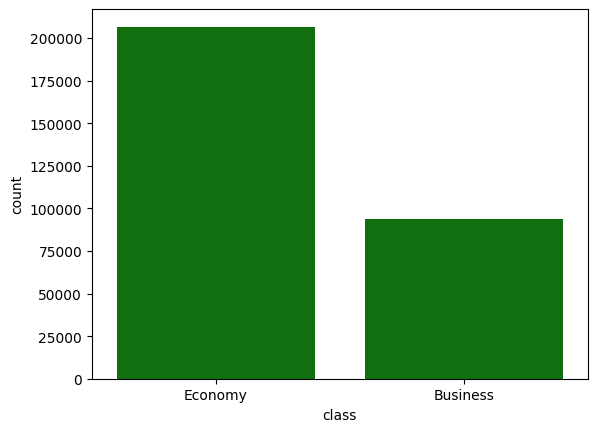

In [47]:
 sns.countplot(x=df['class'],color='g')

# **Tickets with Ecomomy class are more than Business class**

<Axes: xlabel='class', ylabel='price'>

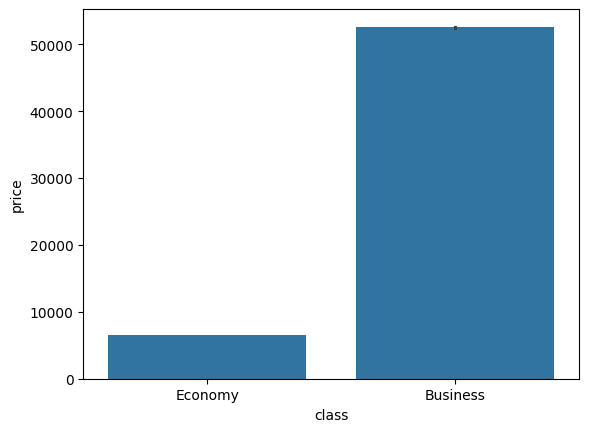

In [48]:
sns.barplot(x=df['class'],y=df['price'])

# **Business Class tickets are more expensive**

<Axes: xlabel='airline', ylabel='price'>

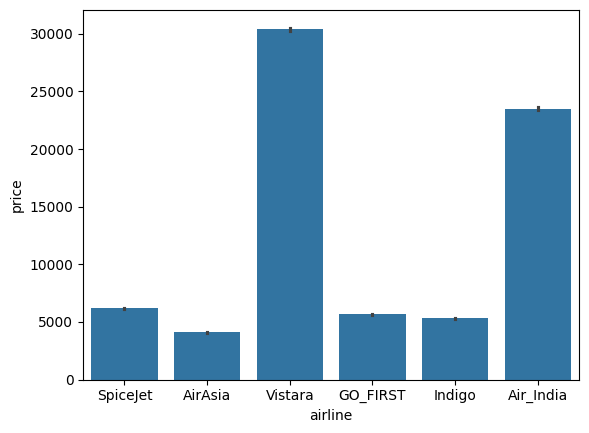

In [49]:
sns.barplot(x=df['airline'],y=df['price'])

# **Vistara airline Tickets are most expensive**

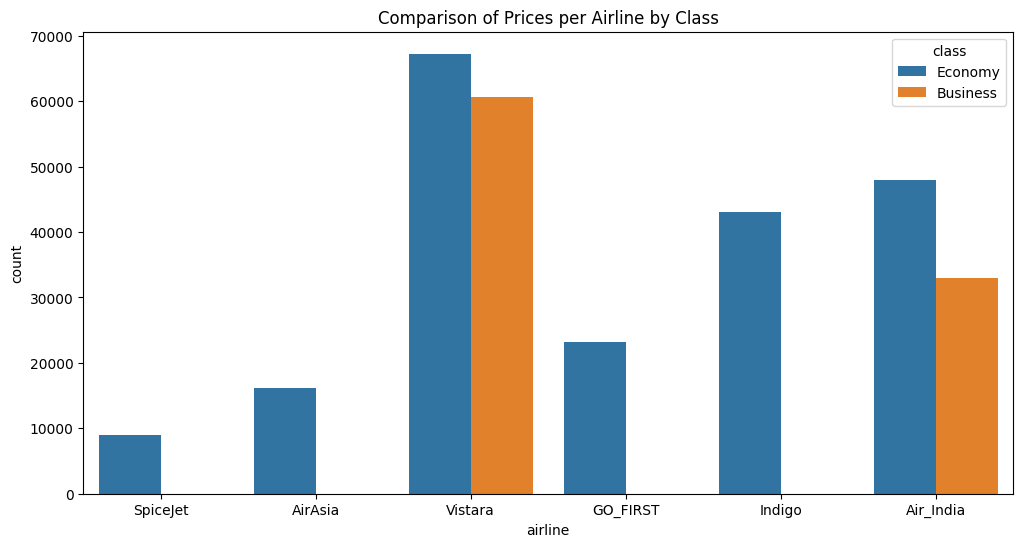

In [50]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='airline', hue='class')
plt.title("Comparison of Prices per Airline by Class")
plt.show()


# **Vistara and Air_India Airlines are the ones who only have Business Class**

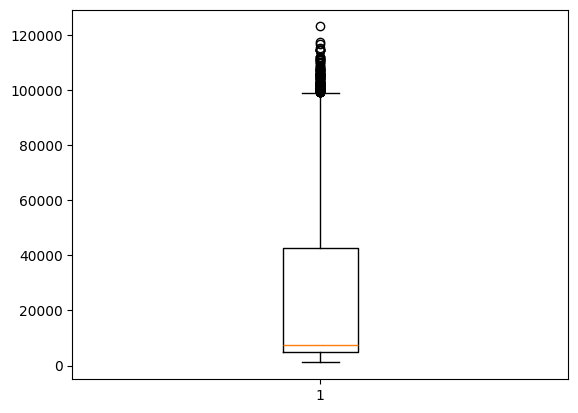

In [51]:
plt.boxplot(df['price'])
plt.show()

# **There are alot of Outliers in Price**





<Axes: xlabel='duration', ylabel='class'>

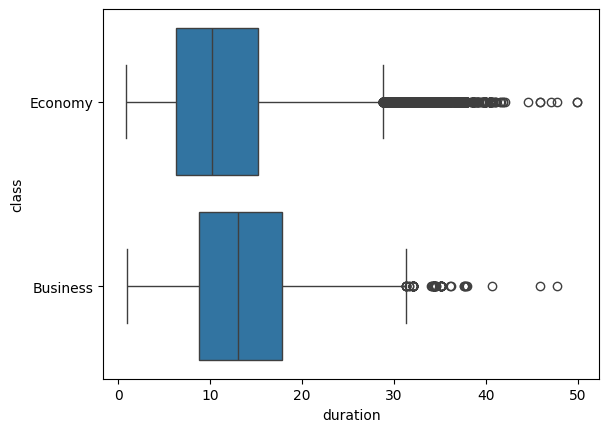

In [52]:
sns.boxplot(x=df['duration'],y=df['class'])


# **There are alot of outliers in Economy Class Duration**

<Axes: xlabel='duration', ylabel='price'>

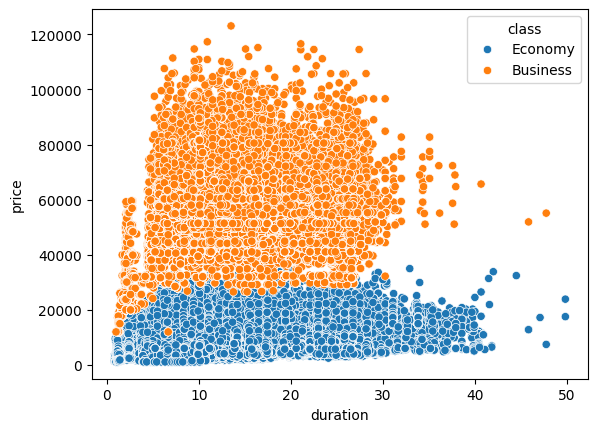

In [53]:
sns.scatterplot(data=df,x='duration',y='price',hue='class')

<Axes: xlabel='days_left', ylabel='price'>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


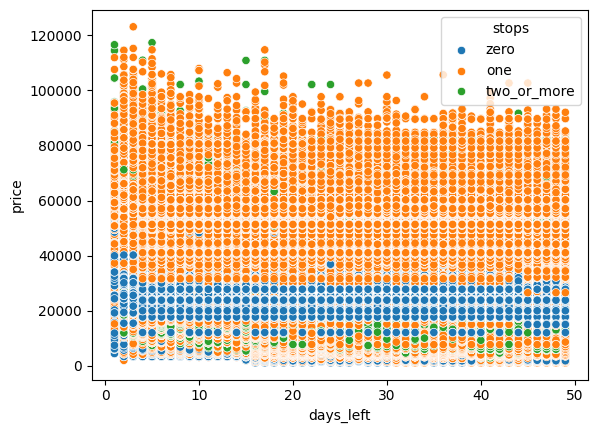

In [54]:
sns.scatterplot(data=df,x='days_left',y='price',hue='stops')

<Axes: xlabel='price', ylabel='airline'>

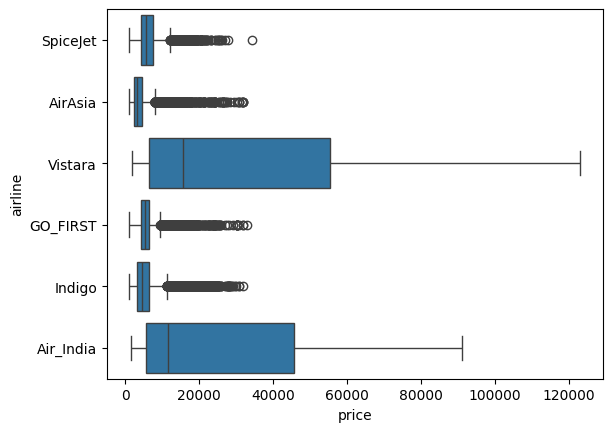

In [55]:
sns.boxplot(x=df['price'],y=df['airline'])

# **Alot of Outliers in price of Arilines Tickets**

<Axes: xlabel='price', ylabel='class'>

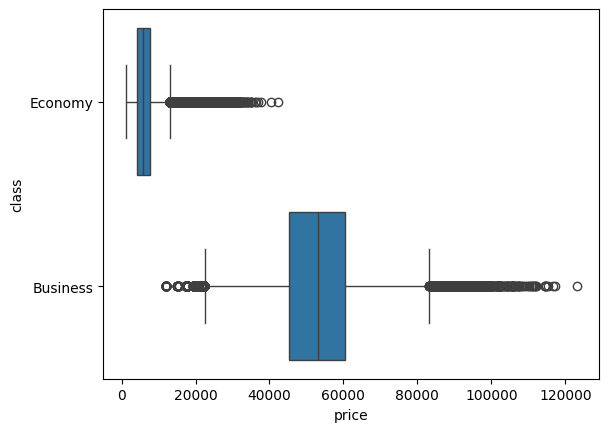

In [56]:
sns.boxplot(x=df['price'],y=df['class'])

<Axes: xlabel='price', ylabel='source_city'>

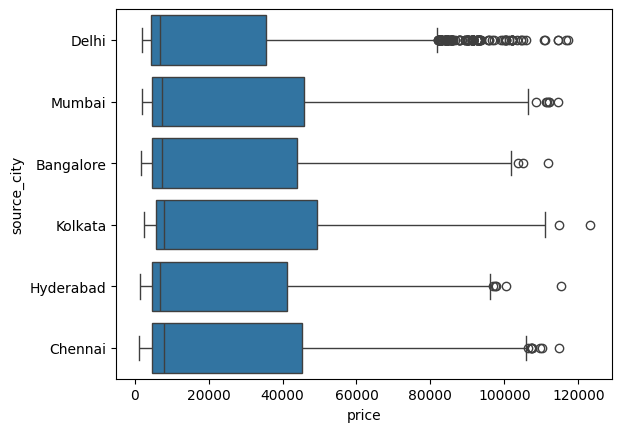

In [57]:
sns.boxplot(x=df['price'],y=df['source_city'])

<Axes: xlabel='price', ylabel='class'>

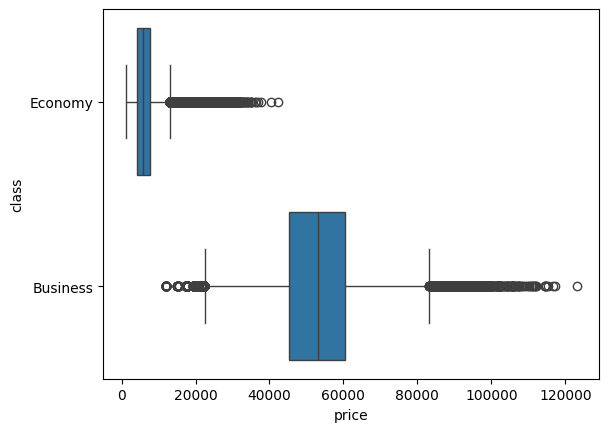

In [58]:
sns.boxplot(x=df['price'],y=df['class'])

<Axes: >

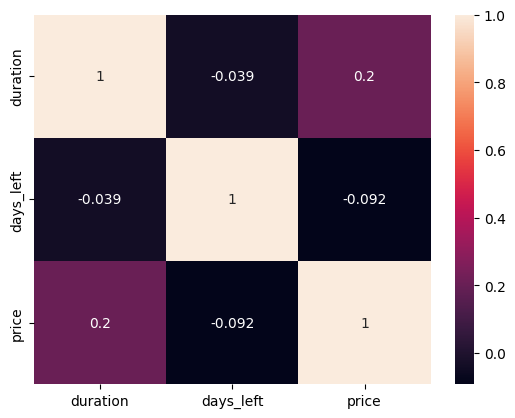

In [59]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

# **Lets Deal with Outliers⏬⏬**

<Axes: xlabel='price', ylabel='Count'>

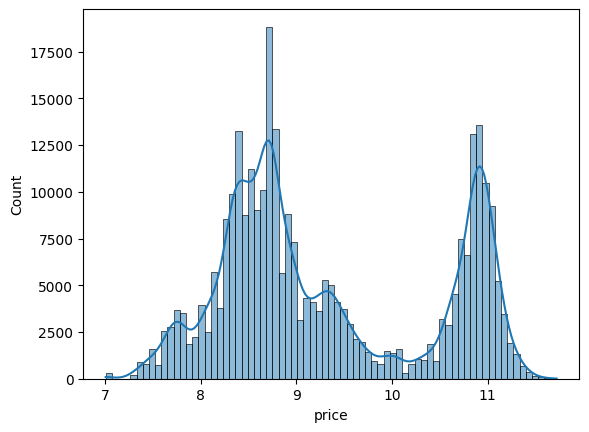

In [60]:
df['price']=np.log1p(df['price'])
sns.histplot(df['price'],kde=True)

In [61]:
df['price'].max()

11.720524828948452

# **Lets Do Encoding for Categorical Data**

In [62]:
categorical_columns=df.select_dtypes(include=['object']).columns
categorical_columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class'],
      dtype='object')

In [63]:
for i in categorical_columns:
  print(f"{i}:{df[i].unique()}")

airline:['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
flight:['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
source_city:['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
departure_time:['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
stops:['zero' 'one' 'two_or_more']
arrival_time:['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
destination_city:['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
class:['Economy' 'Business']


In [64]:
df=pd.get_dummies(df,columns=['airline'],drop_first=True)


In [65]:
df=pd.get_dummies(df,columns=['departure_time'],drop_first=True)
df=pd.get_dummies(df,columns=['source_city'],drop_first=True)
df=pd.get_dummies(df,columns=['destination_city'],drop_first=True)
df=pd.get_dummies(df,columns=['stops'],drop_first=True)
df=pd.get_dummies(df,columns=['arrival_time'],drop_first=True)
df.head(5)


,flight,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,stops_two_or_more,stops_zero,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,SG-8709,Economy,2.17,1,8.691819,False,False,False,True,False,...,False,False,True,False,True,False,False,False,False,True
1,SG-8157,Economy,2.33,1,8.691819,False,False,False,True,False,...,False,False,True,False,True,False,False,False,True,False
2,I5-764,Economy,2.17,1,8.692322,False,False,False,False,False,...,False,False,True,False,True,True,False,False,False,False
3,UK-995,Economy,2.25,1,8.692154,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
4,UK-963,Economy,2.33,1,8.692154,False,False,False,False,True,...,False,False,True,False,True,False,False,False,True,False


In [66]:
df.drop(columns=['flight'],inplace=True)

In [67]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['class']=le.fit_transform(df['class'])
df['class'].head(5)

,class
0,1
1,1
2,1
3,1
4,1


In [68]:
df.head()

,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,departure_time_Early_Morning,...,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,stops_two_or_more,stops_zero,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,1,2.17,1,8.691819,False,False,False,True,False,False,...,False,False,True,False,True,False,False,False,False,True
1,1,2.33,1,8.691819,False,False,False,True,False,True,...,False,False,True,False,True,False,False,False,True,False
2,1,2.17,1,8.692322,False,False,False,False,False,True,...,False,False,True,False,True,True,False,False,False,False
3,1,2.25,1,8.692154,False,False,False,False,True,False,...,False,False,True,False,True,False,False,False,False,False
4,1,2.33,1,8.692154,False,False,False,False,True,False,...,False,False,True,False,True,False,False,False,True,False


# **Lets do Scaling for all Numeric Columns**

In [69]:
df['price'].max()


11.720524828948452

# **Data is Ready Now!!**

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [71]:
X=df.drop(columns=['price'])
Y=df['price']

In [72]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [73]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
min_max=MinMaxScaler()
X_train[['duration','days_left']]=min_max.fit_transform(X_train[['duration','days_left']])
X_train.head(5)

,class,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,departure_time_Early_Morning,departure_time_Evening,...,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,stops_two_or_more,stops_zero,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
148417,1,0.379388,0.104167,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
36879,1,0.125918,0.250000,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
274531,0,0.415102,0.895833,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
166397,1,0.192245,0.208333,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
272722,0,0.523878,0.083333,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [74]:
X_test[['duration','days_left']]=min_max.transform(X_test[['duration','days_left']])
X_test.head(5)

,class,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,departure_time_Early_Morning,departure_time_Evening,...,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,stops_two_or_more,stops_zero,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
27131,1,0.386122,0.812500,True,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
266857,0,0.183673,0.854167,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
141228,1,0.197347,0.833333,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
288329,0,0.278980,0.270833,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
97334,1,0.151429,0.395833,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [75]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [76]:
print(model.coef_)
print(model.intercept_)

[-2.02614271  0.1739278  -0.6914015   0.52073065  0.41263449  0.32259325
  0.46898367  0.64468698  0.01916875 -0.00859844  0.03461059  0.03505134
 -0.00767993 -0.04660842 -0.02612445 -0.08874139  0.14047467 -0.04659981
 -0.04355279 -0.02204373 -0.09785951  0.10646642 -0.02460058  0.22195643
 -0.4531969  -0.07043804  0.03370862  0.01022104 -0.01642926  0.0291268 ]
10.584629237507391


In [77]:
y_pred=model.predict(X_test)


In [78]:
mae=mean_absolute_error(Y_test, y_pred)
mse=mean_squared_error(Y_test,y_pred)
r2=r2_score(Y_test,y_pred)
print(f"For Test data->\nmae: {mae}, mse: {mse}, r2: {r2}")

For Test data->
mae: 0.25370089002438406, mse: 0.10381329229318917, r2: 0.916181056487755


In [79]:
y_pred=model.predict(X_train)
mae=mean_absolute_error(Y_train, y_pred)
mse=mean_squared_error(Y_train,y_pred)
r2=r2_score(Y_train,y_pred)
print(f"For Train data->\nmae: {mae}, mse: {mse}, r2: {r2}")

For Train data->
mae: 0.25487846689310234, mse: 0.1050472627295609, r2: 0.915141954904649


# **There is No underfit Or Overfit and model performs well**

In [83]:
import joblib

joblib.dump(model, "model.pkl")

['model.pkl']